In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.linspace(-1, 1, 100)
signal = 2 + x + 2 * x * x
np.random.seed(2)
noise = np.random.normal(0, 0.1, 100)
y = signal + noise

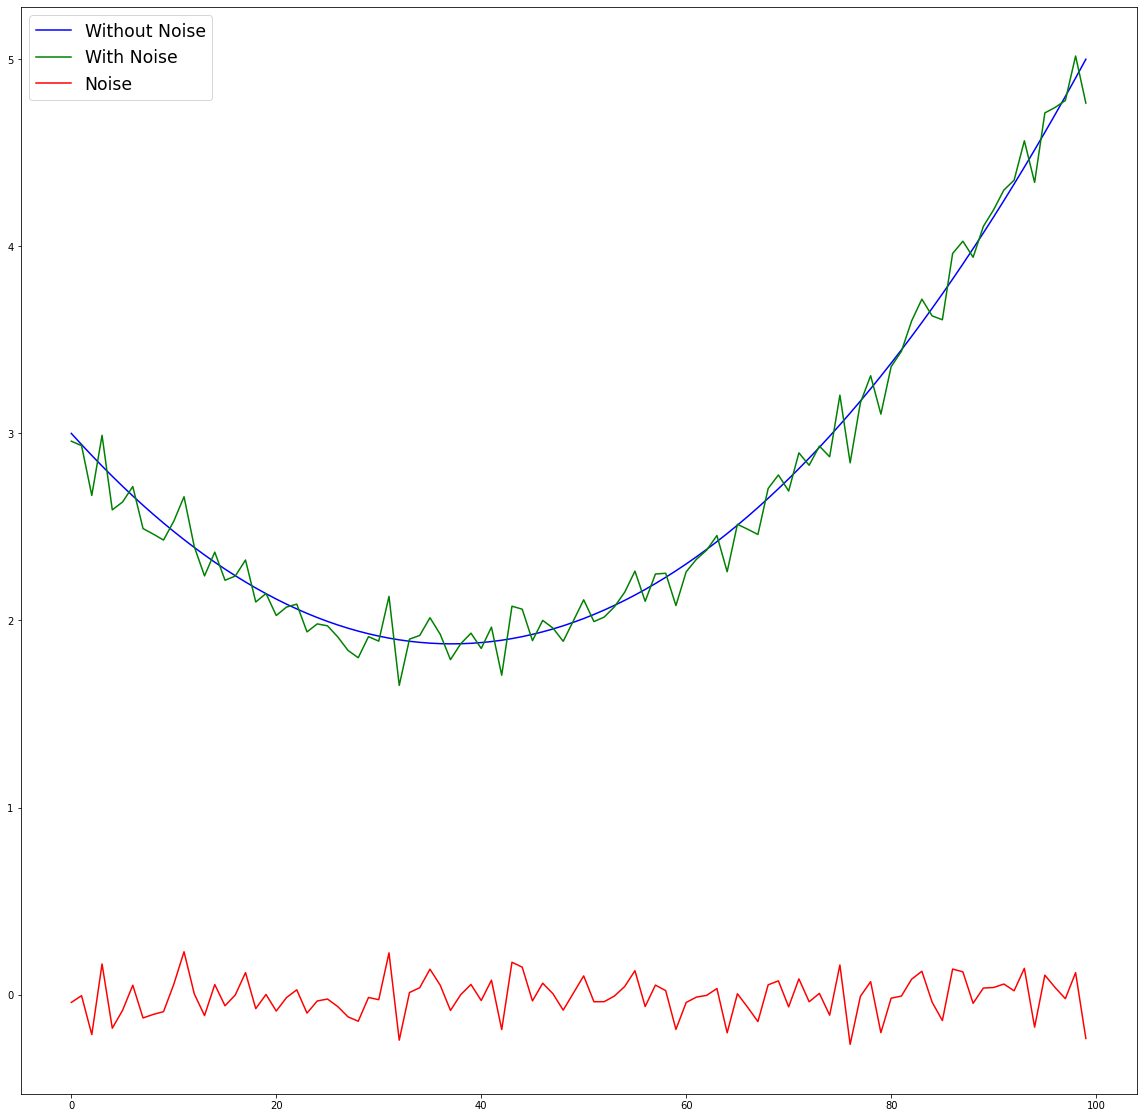

In [14]:
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.plot(signal, 'b', label="Without Noise")
plt.plot(y, 'g', label="With Noise")
plt.plot(noise, 'r', label="Noise")
plt.legend(loc='best', title_fontsize='medium', fontsize='xx-large')
plt.show()

In [15]:
x_train = x[0:80]
y_train = y[0:80]

In [16]:
def create_model(x_train, degree):
    degree += 1
    X_train = np.column_stack([np.power(x[0:80], i) for i in range(0, degree)])
    model = np.dot(np.dot(np.linalg.inv(np.dot(X_train.transpose(), X_train)), X_train.transpose()), y[0:80])
    plt.plot(x, y, 'g', label="Actual")
    predicted = np.dot(model, [np.power(x, i) for i in range(0, degree)])
    plt.plot(x, predicted, 'r', label='predicted')
    
    train_rmse1 = np.sqrt(np.sum(np.dot(y[0:80] - predicted[0:80], y[0:80] - predicted[0:80])))
    test_rmse1 = np.sqrt(np.sum(np.dot(y[80:] - predicted[80:], y[80:] - predicted[80:])))
    
    print("Train RMSE(Degree = " + str(degree)+"):", round(train_rmse1, 2))
    print("Test RMSE(Degree = " + str(degree) + "):", round(test_rmse1, 2))

    plt.legend()
    plt.show()
    

Train RMSE(Degree = 2): 3.44
Test RMSE(Degree = 2): 7.73


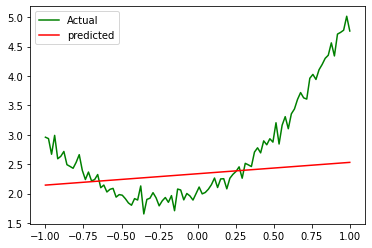

In [17]:
create_model(x_train, 1)

Train RMSE(Degree = 3): 0.91
Test RMSE(Degree = 3): 0.66


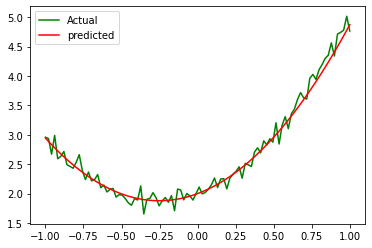

In [18]:
create_model(x_train, 2)

Train RMSE(Degree = 9): 0.88
Test RMSE(Degree = 9): 8.94


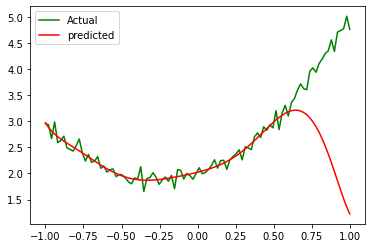

In [19]:
create_model(x_train, 8)

In [20]:
import torch

In [21]:
a = torch.zeros(10, 1)
a

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [22]:
a.shape

torch.Size([10, 1])

In [23]:
b = torch.chunk(a, 5, 0)
b

(tensor([[0.],
         [0.]]),
 tensor([[0.],
         [0.]]),
 tensor([[0.],
         [0.]]),
 tensor([[0.],
         [0.]]),
 tensor([[0.],
         [0.]]))

In [24]:
d = torch.chunk(a, 3, 0)
d

(tensor([[0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[0.],
         [0.]]))

In [25]:
b = torch.split(a, 2, 0)
b

(tensor([[0.],
         [0.]]),
 tensor([[0.],
         [0.]]),
 tensor([[0.],
         [0.]]),
 tensor([[0.],
         [0.]]),
 tensor([[0.],
         [0.]]))

In [26]:
a = torch.FloatTensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [27]:
a.shape

torch.Size([3, 3])

In [28]:
index = torch.LongTensor([0, 1])
b = torch.index_select(a, 0, index)
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [29]:
b.shape

torch.Size([2, 3])

In [30]:
c = torch.index_select(a, 1, index)
c

tensor([[1., 2.],
        [4., 5.],
        [7., 8.]])

In [31]:
c.shape

torch.Size([3, 2])

In [32]:
a = torch.FloatTensor([[1, 2, 3], [4, 5, 6],  [7, 8, 9]])
a

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [33]:
a.shape

torch.Size([3, 3])

In [34]:
mask = torch.ByteTensor([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
mask

tensor([[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]], dtype=torch.uint8)

In [35]:
mask.shape

torch.Size([3, 3])

In [36]:
b = torch.masked_select(a, mask)
b

/tmp/ipykernel_3411/936109423.py:1: UserWarning: masked_select received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1004.)
  b = torch.masked_select(a, mask)


tensor([2., 4., 5., 6., 8.])

In [37]:
b.shape

torch.Size([5])

In [38]:
a = torch.zeros(2, 3, 1)
a

tensor([[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]])

In [39]:
a.shape

torch.Size([2, 3, 1])

In [40]:
b = a.squeeze()
b

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [41]:
b.shape

torch.Size([2, 3])

In [42]:
d = torch.unsqueeze(a, 0)
d

tensor([[[[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]]]])

In [43]:
d.shape

torch.Size([1, 2, 3, 1])

In [44]:
c = torch.unsqueeze(a, 1)
c

tensor([[[[0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.]]]])

In [45]:
c.shape

torch.Size([2, 1, 3, 1])

In [46]:
e = torch.unsqueeze(a, 2)
e

tensor([[[[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]]]])

In [47]:
e.shape

torch.Size([2, 3, 1, 1])

In [48]:
a = torch.arange(1, 10).view(3,3)
a

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [49]:
torch.unbind(a, 0)

(tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8, 9]))

In [50]:
torch.unbind(a, 1)

(tensor([1, 4, 7]), tensor([2, 5, 8]), tensor([3, 6, 9]))

In [51]:
a = torch.zeros(3,3)
a

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [52]:
a.shape

torch.Size([3, 3])

In [53]:
b = torch.ones(3,3)
b

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [54]:
b.shape

torch.Size([3, 3])

In [55]:
c = torch.rand(3,3)
c

tensor([[0.2680, 0.3510, 0.9391],
        [0.2684, 0.0880, 0.6923],
        [0.4237, 0.6819, 0.2006]])

In [56]:
d = torch.where(c > 0.5, a, b)
d

tensor([[1., 1., 0.],
        [1., 1., 0.],
        [1., 0., 1.]])

In [57]:
d.shape

torch.Size([3, 3])

In [58]:
a = torch.rand(3, 3)
a

tensor([[0.3879, 0.7686, 0.2992],
        [0.1084, 0.3600, 0.8864],
        [0.9573, 0.6582, 0.3751]])

In [59]:
a.shape

torch.Size([3, 3])

In [60]:
torch.any(a > 0)

tensor(True)

In [61]:
torch.any(a > 1)

tensor(False)

In [62]:
torch.all(a > 0)

tensor(True)

In [63]:
torch.all(a > 1)

tensor(False)

In [64]:
a = torch.arange(1, 10)
a

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
b = a.view(3,3)
b

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [66]:
b.shape

torch.Size([3, 3])

In [67]:
c = a.view(3, -1)
c

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [68]:
c.shape

torch.Size([3, 3])

In [69]:
a = torch.ones(2,2,2,2)
a

tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])

In [70]:
a.shape

torch.Size([2, 2, 2, 2])

In [71]:
b = torch.flatten(a)
b

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
b.shape

torch.Size([16])

In [73]:
c = torch.flatten(a, start_dim=0)
c

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [74]:
c.shape

torch.Size([16])

In [75]:
d = torch.flatten(a, start_dim=1)
d

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [76]:
d.shape

torch.Size([2, 8])

In [77]:
e = torch.flatten(a, start_dim=2)
e

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [78]:
e.shape

torch.Size([2, 2, 4])

In [79]:
f = torch.flatten(a, start_dim=3)
f

tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])

In [80]:
f.shape

torch.Size([2, 2, 2, 2])

In [81]:
a = torch.rand(4,4)
a

tensor([[0.2649, 0.4951, 0.9400, 0.0441],
        [0.8117, 0.0558, 0.4510, 0.4264],
        [0.4515, 0.1216, 0.9293, 0.7361],
        [0.8744, 0.7778, 0.8390, 0.5721]])

In [82]:
a.shape

torch.Size([4, 4])

In [83]:
b = torch.LongTensor([[0,1,2,3]])
b

tensor([[0, 1, 2, 3]])

In [84]:
b.shape

torch.Size([1, 4])

In [85]:
c = a.gather(0, b)
c

tensor([[0.2649, 0.0558, 0.9293, 0.5721]])

In [86]:
c.shape

torch.Size([1, 4])

In [87]:
d = torch.LongTensor([[0],[1],[2],[3],])
d

tensor([[0],
        [1],
        [2],
        [3]])

In [88]:
d.shape

torch.Size([4, 1])

In [89]:
e = a.gather(1, d)
e

tensor([[0.2649],
        [0.0558],
        [0.9293],
        [0.5721]])

In [90]:
e.shape

torch.Size([4, 1])

In [91]:
a = torch.rand(4,4)
a

tensor([[0.3982, 0.1203, 0.6788, 0.1552],
        [0.6395, 0.1272, 0.2345, 0.0311],
        [0.4753, 0.7897, 0.4105, 0.6299],
        [0.5764, 0.9752, 0.7081, 0.9381]])

In [92]:
a.shape

torch.Size([4, 4])

In [93]:
index = torch.LongTensor([[0,1,2,3]])
index

tensor([[0, 1, 2, 3]])

In [94]:
index.shape

torch.Size([1, 4])

In [95]:
values = torch.zeros(1,4)
values

tensor([[0., 0., 0., 0.]])

In [96]:
values.shape

torch.Size([1, 4])

In [97]:
result = a.scatter(0, index, values)
result

tensor([[0.0000, 0.1203, 0.6788, 0.1552],
        [0.6395, 0.0000, 0.2345, 0.0311],
        [0.4753, 0.7897, 0.0000, 0.6299],
        [0.5764, 0.9752, 0.7081, 0.0000]])

In [98]:
result.shape

torch.Size([4, 4])

In [99]:
a

tensor([[0.3982, 0.1203, 0.6788, 0.1552],
        [0.6395, 0.1272, 0.2345, 0.0311],
        [0.4753, 0.7897, 0.4105, 0.6299],
        [0.5764, 0.9752, 0.7081, 0.9381]])

In [100]:
a = torch.rand(3,3)
a

tensor([[0.7870, 0.7688, 0.7141],
        [0.6443, 0.5369, 0.4703],
        [0.9802, 0.4830, 0.9869]])

In [101]:
b = a+a*1e-3
b

tensor([[0.7878, 0.7696, 0.7148],
        [0.6449, 0.5374, 0.4708],
        [0.9812, 0.4835, 0.9879]])

In [102]:
torch.allclose(a,b,rtol=1e-1)

True

In [103]:
torch.allclose(a,b,rtol=1e-2)

True

In [104]:
torch.allclose(a,b,rtol=1e-3)

True

In [105]:
torch.allclose(a,b,rtol=1e-4)

False

In [106]:
torch.allclose(a,b,atol=1e-1)

True

In [107]:
torch.allclose(a,b,atol=1e-4)

False

In [108]:
a = torch.rand(3,3)
a

tensor([[0.4751, 0.7747, 0.3975],
        [0.4150, 0.6277, 0.6750],
        [0.8354, 0.0880, 0.1419]])

In [109]:
a.shape

torch.Size([3, 3])

In [110]:
torch.argmax(a, dim=0)

tensor([2, 0, 1])

In [112]:
torch.argmax(a, dim=1)

tensor([1, 2, 0])

In [113]:
torch.argmin(a, dim=0)

tensor([1, 2, 2])

In [114]:
torch.argmin(a, dim=1)

tensor([2, 0, 1])

In [115]:
a = torch.rand(3,3)
a

tensor([[0.0429, 0.6306, 0.5539],
        [0.8229, 0.7359, 0.0236],
        [0.2774, 0.9091, 0.1258]])

In [116]:
a.shape

torch.Size([3, 3])

In [117]:
torch.argsort(a, dim=0)

tensor([[0, 0, 1],
        [2, 1, 2],
        [1, 2, 0]])

In [118]:
torch.argsort(a, dim=1)

tensor([[0, 2, 1],
        [2, 1, 0],
        [2, 0, 1]])

In [119]:
a = torch.rand(3,3)
a

tensor([[0.5338, 0.8962, 0.1675],
        [0.7893, 0.7533, 0.7439],
        [0.0541, 0.0881, 0.7906]])

In [120]:
a.shape

torch.Size([3, 3])

In [121]:
b = torch.cumsum(a, dim=0)
b

tensor([[0.5338, 0.8962, 0.1675],
        [1.3231, 1.6495, 0.9114],
        [1.3772, 1.7376, 1.7020]])

In [122]:
b.shape

torch.Size([3, 3])

In [123]:
c = torch.cumsum(a, dim=1)
c

tensor([[0.5338, 1.4301, 1.5976],
        [0.7893, 1.5425, 2.2864],
        [0.0541, 0.1422, 0.9328]])

In [124]:
c.shape

torch.Size([3, 3])

In [125]:
a = torch.rand(3,3)
a

tensor([[0.2789, 0.9842, 0.7644],
        [0.7613, 0.5025, 0.0878],
        [0.2614, 0.2382, 0.4849]])

In [126]:
a.shape

torch.Size([3, 3])

In [127]:
b = torch.cumprod(a,dim=0)

In [128]:
b

tensor([[0.2789, 0.9842, 0.7644],
        [0.2123, 0.4946, 0.0671],
        [0.0555, 0.1178, 0.0325]])

In [129]:
b.shape

torch.Size([3, 3])

In [130]:
c = torch.cumprod(a, dim=1)
c

tensor([[0.2789, 0.2745, 0.2098],
        [0.7613, 0.3826, 0.0336],
        [0.2614, 0.0623, 0.0302]])

In [131]:
a = torch.tensor([[1,-1,1],[1,-1,1],[1,-1,1]])
a

tensor([[ 1, -1,  1],
        [ 1, -1,  1],
        [ 1, -1,  1]])

In [132]:
b = torch.abs(a)
b

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [133]:
a = torch.rand(3,3)
a

tensor([[0.4902, 0.9289, 0.3157],
        [0.6645, 0.5609, 0.3237],
        [0.1308, 0.7034, 0.4427]])

In [134]:
b = torch.clamp(a, min=0.25, max=0.50)
b

tensor([[0.4902, 0.5000, 0.3157],
        [0.5000, 0.5000, 0.3237],
        [0.2500, 0.5000, 0.4427]])

In [135]:
a = torch.rand(3,3) * 100
a

tensor([[80.4783, 20.4948,  6.6343],
        [60.6074, 98.9751, 39.4203],
        [51.9689, 63.9897,  3.8257]])

In [136]:
b = torch.floor(a)
b

tensor([[80., 20.,  6.],
        [60., 98., 39.],
        [51., 63.,  3.]])

In [137]:
c = torch.ceil(a)
c

tensor([[81., 21.,  7.],
        [61., 99., 40.],
        [52., 64.,  4.]])

In [138]:
a = torch.rand(3,3)
a

tensor([[0.4836, 0.2392, 0.6943],
        [0.6421, 0.9525, 0.5223],
        [0.8276, 0.3476, 0.7878]])

In [139]:
b = torch.FloatTensor([[0,1,0],[1,1,1],[0,1,0]])
b

tensor([[0., 1., 0.],
        [1., 1., 1.],
        [0., 1., 0.]])

In [140]:
c = torch.mul(a,b)
c

tensor([[0.0000, 0.2392, 0.0000],
        [0.6421, 0.9525, 0.5223],
        [0.0000, 0.3476, 0.0000]])

In [141]:
a = torch.rand(3,3)
a

tensor([[0.3137, 0.8005, 0.6088],
        [0.9996, 0.0430, 0.2990],
        [0.0405, 0.6065, 0.3072]])

In [142]:
b = torch.FloatTensor([[1,2,1],[2,2,2],[1,2,1]])
b

tensor([[1., 2., 1.],
        [2., 2., 2.],
        [1., 2., 1.]])

In [143]:
c = torch.div(a,b)
c

tensor([[0.3137, 0.4002, 0.6088],
        [0.4998, 0.0215, 0.1495],
        [0.0405, 0.3032, 0.3072]])

In [144]:
a = torch.linspace(-1.0, 1.0, steps=10)
a

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])

In [145]:
torch.sin(a)

tensor([-0.8415, -0.7017, -0.5274, -0.3272, -0.1109,  0.1109,  0.3272,  0.5274,
         0.7017,  0.8415])

In [146]:
torch.cos(a)

tensor([0.5403, 0.7125, 0.8496, 0.9450, 0.9938, 0.9938, 0.9450, 0.8496, 0.7125,
        0.5403])

In [147]:
torch.tan(a)

tensor([-1.5574, -0.9849, -0.6208, -0.3463, -0.1116,  0.1116,  0.3463,  0.6208,
         0.9849,  1.5574])

In [148]:
torch.asin(a)

tensor([-1.5708, -0.8911, -0.5890, -0.3398, -0.1113,  0.1113,  0.3398,  0.5890,
         0.8911,  1.5708])

In [149]:
torch.acos(a)

tensor([3.1416, 2.4619, 2.1598, 1.9106, 1.6821, 1.4595, 1.2310, 0.9818, 0.6797,
        0.0000])

In [150]:
torch.atan(a)

tensor([-0.7854, -0.6610, -0.5071, -0.3218, -0.1107,  0.1107,  0.3218,  0.5071,
         0.6610,  0.7854])

In [151]:
a = torch.linspace(-1.0, 1.0, steps=10)
a

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])

In [152]:
torch.sigmoid(a)

tensor([0.2689, 0.3148, 0.3646, 0.4174, 0.4723, 0.5277, 0.5826, 0.6354, 0.6852,
        0.7311])

In [153]:
torch.tanh(a)

tensor([-0.7616, -0.6514, -0.5047, -0.3215, -0.1107,  0.1107,  0.3215,  0.5047,
         0.6514,  0.7616])

In [154]:
torch.log1p(a)

tensor([   -inf, -1.5041, -0.8109, -0.4055, -0.1178,  0.1054,  0.2877,  0.4418,
         0.5754,  0.6931])

In [155]:
torch.erf(a)

tensor([-0.8427, -0.7286, -0.5679, -0.3626, -0.1249,  0.1249,  0.3626,  0.5679,
         0.7286,  0.8427])

In [156]:
torch.erfinv(a)

tensor([   -inf, -0.8631, -0.5407, -0.3046, -0.0988,  0.0988,  0.3046,  0.5407,
         0.8631,     inf])

In [157]:
a = torch.rand(3,3)
a

tensor([[0.1630, 0.3474, 0.4651],
        [0.5623, 0.9013, 0.8445],
        [0.3804, 0.6391, 0.7648]])

In [158]:
b = torch.rand(3,3)
b

tensor([[0.8359, 0.6509, 0.3436],
        [0.4539, 0.8089, 0.8353],
        [0.7039, 0.1744, 0.8266]])

In [159]:
torch.ge(a,b)

tensor([[False, False,  True],
        [ True,  True,  True],
        [False,  True, False]])

In [161]:
 torch.ge(torch.tensor([[1, 2], 
                        [3, 4]]), 
          torch.tensor([[1, 1], 
                        [4, 4]]))

tensor([[ True,  True],
        [False,  True]])

In [162]:
torch.le(a,b)

tensor([[ True,  True, False],
        [False, False, False],
        [ True, False,  True]])

In [163]:
 torch.le(torch.tensor([[1, 2], 
                        [3, 4]]), 
          torch.tensor([[1, 1], 
                        [4, 4]]))

tensor([[ True, False],
        [ True,  True]])

In [164]:
torch.eq(a,b)

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [165]:
torch.ne(a,b)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [167]:
a = torch.ones(2,3)
a

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [168]:
b = torch.ones(3,2)
b

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [170]:
c = torch.matmul(a,b)
c

tensor([[3., 3.],
        [3., 3.]])

In [171]:
c.shape

torch.Size([2, 2])

In [172]:
a = torch.ones(2,2,3)
a

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [173]:
a.shape

torch.Size([2, 2, 3])

In [174]:
b = torch.ones(2,3,2)
b

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [175]:
b.shape

torch.Size([2, 3, 2])

In [176]:
m = torch.ones(2,2)
m

tensor([[1., 1.],
        [1., 1.]])

In [177]:
m.shape

torch.Size([2, 2])

In [178]:
torch.addbmm(2,m,3,a,b)

/tmp/ipykernel_3411/2630375927.py:1: UserWarning: This overload of addbmm is deprecated:
	addbmm(Number beta, Tensor input, Number alpha, Tensor batch1, Tensor batch2, *, Tensor out)
Consider using one of the following signatures instead:
	addbmm(Tensor input, Tensor batch1, Tensor batch2, *, Number beta, Number alpha, Tensor out) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1005.)
  torch.addbmm(2,m,3,a,b)


tensor([[20., 20.],
        [20., 20.]])

In [179]:
torch.addbmm(1,m,1,a,b)

tensor([[7., 7.],
        [7., 7.]])

In [180]:
torch.addbmm(m,a,b)

tensor([[7., 7.],
        [7., 7.]])

In [181]:
a = torch.ones(2,3)
a

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [182]:
a.shape

torch.Size([2, 3])

In [183]:
b = torch.ones(3,2)
b

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [184]:
b.shape

torch.Size([3, 2])

In [185]:
m = torch.ones(2,2)
m

tensor([[1., 1.],
        [1., 1.]])

In [186]:
m.shape

torch.Size([2, 2])

In [187]:
torch.addmm(m,a,b)

tensor([[4., 4.],
        [4., 4.]])

In [188]:
torch.addmm(2,m,3,a,b)

tensor([[11., 11.],
        [11., 11.]])

In [190]:
torch.addmm(1, m, 1, a, b)

tensor([[4., 4.],
        [4., 4.]])

In [191]:
a = torch.ones(2,3)
a

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [192]:
a.shape

torch.Size([2, 3])

In [193]:
b = torch.ones(3)
b

tensor([1., 1., 1.])

In [196]:
b.shape

torch.Size([3])

In [194]:
m = torch.ones(2)
m

tensor([1., 1.])

In [195]:
m.shape

torch.Size([2])

In [197]:
torch.addmv(2,m,3,a,b)

tensor([11., 11.])

In [198]:
torch.addmv(1,m,1,a,b)

tensor([4., 4.])

In [199]:
torch.addmv(m,a,b)

tensor([4., 4.])

In [200]:
a = torch.tensor([1.0,2.0,3.0])
a

tensor([1., 2., 3.])

In [201]:
a.shape

torch.Size([3])

In [202]:
b = a

In [204]:
m = torch.ones(3,3)
m

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [205]:
torch.addr(m,a,b)

tensor([[ 2.,  3.,  4.],
        [ 3.,  5.,  7.],
        [ 4.,  7., 10.]])

In [212]:
np.outer(a,b)

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]], dtype=float32)

In [213]:
m = torch.zeros(3,3)
m

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [214]:
torch.addr(m,a,b)

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [215]:
a = torch.ones(2,2,3)
a

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [216]:
a.shape

torch.Size([2, 2, 3])

In [217]:
b = torch.ones(2,3,2)
b

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [218]:
b.shape

torch.Size([2, 3, 2])

In [219]:
m = torch.ones(2,2,2)
m

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [220]:
m.shape

torch.Size([2, 2, 2])

In [222]:
c = torch.baddbmm(1,m,1,a,b)
c

tensor([[[4., 4.],
         [4., 4.]],

        [[4., 4.],
         [4., 4.]]])

In [223]:
c.shape

torch.Size([2, 2, 2])

In [224]:
torch.baddbmm(2,m,1,a,b)

tensor([[[5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.]]])

In [225]:
torch.baddbmm(1,m,2,a,b)

tensor([[[7., 7.],
         [7., 7.]],

        [[7., 7.],
         [7., 7.]]])

In [226]:
a = torch.ones(2,2,3)
a

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [227]:
b = torch.ones(2,3,2)
b

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [229]:
c = torch.bmm(a,b)
c

tensor([[[3., 3.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]]])

In [230]:
c.shape

torch.Size([2, 2, 2])

In [231]:
a = torch.rand(3)
a

tensor([0.1150, 0.4132, 0.7745])

In [232]:
b = torch.rand(3)
b

tensor([0.7282, 0.2413, 0.5400])

In [233]:
torch.dot(a,b)

tensor(0.6016)

In [237]:
a = torch.rand(3,3)
a

tensor([[0.0567, 0.2490, 0.4111],
        [0.6008, 0.1171, 0.5855],
        [0.7933, 0.7464, 0.7250]])

In [238]:
values, vectors = torch.eig(a, eigenvectors=True)

In [239]:
values

tensor([[ 1.4847,  0.0000],
        [-0.2930,  0.0634],
        [-0.2930, -0.0634]])

In [240]:
vectors

tensor([[ 3.1899e-01,  7.9098e-04,  4.2040e-01],
        [ 4.8798e-01,  6.8271e-01,  0.0000e+00],
        [ 8.1248e-01, -4.7894e-01, -3.5746e-01]])

In [241]:
values[0,0] * vectors[:,0].reshape(3,1)

tensor([[0.4736],
        [0.7245],
        [1.2063]])

In [243]:
torch.mm(a, vectors[:,0].reshape(3,1))

tensor([[0.4736],
        [0.7245],
        [1.2063]])

In [244]:
vectors[:,0].reshape(3,1)

tensor([[0.3190],
        [0.4880],
        [0.8125]])

In [245]:
vectors[:,0].reshape(3,1) * 1.4847

tensor([[0.4736],
        [0.7245],
        [1.2063]])

In [247]:
a = torch.rand(3)
a

tensor([0.4013, 0.2480, 0.3060])

In [248]:
b = torch.rand(3)
b

tensor([0.9275, 0.1627, 0.8163])

In [249]:
torch.cross(a,b)

tensor([ 0.1526, -0.0438, -0.1647])

In [250]:
a = torch.ones(4)
a

tensor([1., 1., 1., 1.])

In [251]:
torch.norm(a,1)

tensor(4.)

In [258]:
torch.norm(a,2)

tensor(2.)

In [259]:
torch.norm(a,3)

tensor(1.5874)

In [260]:
torch.norm(a,4)

tensor(1.4142)

In [263]:
torch.norm(a,5)

tensor(1.3195)

In [264]:
torch.norm(a,float('inf'))

tensor(1.)

In [261]:
4**(1/3)

1.5874010519681994

In [262]:
4**(1/4)

1.4142135623730951

In [265]:
4**(1/5)

1.3195079107728942

In [266]:
4**(1/50000)

1.0000277262715884

In [288]:
a = torch.FloatTensor([[1,2,3,4]])
a

tensor([[1., 2., 3., 4.]])

In [289]:
torch.renorm(a,2, 0,maxnorm=1)

tensor([[0.1826, 0.3651, 0.5477, 0.7303]])

In [301]:
1 + 4 + 9 + 16

30

In [302]:
np.sqrt(30)

5.477225575051661

In [305]:
1*1/5.477

0.18258170531312762

In [306]:
2*1/5.477

0.36516341062625524

In [307]:
3*1/5.477

0.5477451159393828

In [309]:
4*1/5.477

0.7303268212525105

In [310]:
x = torch.ones(3, 3)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [311]:
x[1].fill_(2)
x[2].fill_(3)
x

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]])

In [317]:
torch.renorm(x, 2, 0, 5)

tensor([[1.0000, 1.0000, 1.0000],
        [2.0000, 2.0000, 2.0000],
        [2.8868, 2.8868, 2.8868]])

In [326]:
3*5/np.sqrt(27)

2.8867513459481287

In [327]:
torch.renorm(x, 1, 0, 5)

tensor([[1.0000, 1.0000, 1.0000],
        [1.6667, 1.6667, 1.6667],
        [1.6667, 1.6667, 1.6667]])

In [328]:
2*5/6

1.6666666666666667